In [1]:
import pandas as pd
import os
import seaborn as sns

In [2]:
def map_ds_to_name(f_path):
    return {"demographic_result.json": "demographic",
            "baseline.json": "baseline",
           "knn_cosine.json": "knn_cosine",
           "knn_euclidean.json": "knn_euclidean",
           "knn_manhattan.json": "knn_manhattan",
           "recommendations_collaborative_filtering.json": "collaborative_filtering",
           "tfidf_results_top_100.json": "contend_based_tf_idf"}[f_path]

In [16]:
dfs_results = []
for r,d,f in os.walk('results'):
    for f_path in f:
            dfs_results.append(pd.read_csv(f'results/{f_path}',sep='|'))
            dfs_results[-1]['TOP_N'] = int(f_path.split('_')[-1].replace('.csv',''))

In [48]:
for res in dfs_results:
    res = res.rename(columns={"Acc": "W/o Grades", "Rec": "W/ Grades"})
    top_n = res['TOP_N'][0]
    print()
    print(f'            TOP_N {top_n}')
    display(res[['W/o Grades','W/ Grades','Methods']])


            TOP_N 5


,W/o Grades,W/ Grades,Methods
0,0.013510,0.012228,knn_euclidean
1,0.003493,0.002575,demographic
2,0.015658,0.013680,knn_manhattan
3,0.008702,0.007903,collaborative_filtering
4,0.016989,0.015421,baseline
5,0.010194,0.008794,knn_cosine
6,0.016388,0.014324,contend_based_tf_idf



            TOP_N 30


,W/o Grades,W/ Grades,Methods
0,0.060096,0.053119,knn_euclidean
1,0.014377,0.011894,demographic
2,0.064282,0.054383,knn_manhattan
3,0.042503,0.035760,collaborative_filtering
4,0.061882,0.053151,baseline
5,0.045993,0.039117,knn_cosine
6,0.061743,0.054643,contend_based_tf_idf



            TOP_N 40


,W/o Grades,W/ Grades,Methods
0,0.072024,0.062827,knn_euclidean
1,0.018911,0.015269,demographic
2,0.077191,0.066156,knn_manhattan
3,0.050182,0.042158,collaborative_filtering
4,0.075514,0.064292,baseline
5,0.057689,0.048407,knn_cosine
6,0.074551,0.064553,contend_based_tf_idf



            TOP_N 10


,W/o Grades,W/ Grades,Methods
0,0.024429,0.021661,knn_euclidean
1,0.006933,0.004862,demographic
2,0.028577,0.025785,knn_manhattan
3,0.018061,0.015184,collaborative_filtering
4,0.029850,0.026046,baseline
5,0.018480,0.016107,knn_cosine
6,0.029808,0.026524,contend_based_tf_idf



            TOP_N 2


,W/o Grades,W/ Grades,Methods
0,0.005856,0.004736,knn_euclidean
1,0.001598,0.001066,demographic
2,0.004265,0.003763,knn_manhattan
3,0.004351,0.003729,collaborative_filtering
4,0.008258,0.007311,baseline
5,0.004617,0.004262,knn_cosine
6,0.007518,0.007170,contend_based_tf_idf



            TOP_N 20


,W/o Grades,W/ Grades,Methods
0,0.043408,0.038751,knn_euclidean
1,0.009463,0.007481,demographic
2,0.048098,0.041441,knn_manhattan
3,0.032155,0.026659,collaborative_filtering
4,0.048518,0.041696,baseline
5,0.034484,0.029396,knn_cosine
6,0.048646,0.042744,contend_based_tf_idf


In [17]:
for df in dfs_results:
    df['Methods'] = df['Dataset'].apply(lambda x : map_ds_to_name(x))

In [44]:
df_all = pd.concat(dfs_results)
df_all.sort_values(by=['TOP_N'], inplace=True)
df_all.head(5)
#df_all = df_all[df_all['Methods'] != 'baseline']

,Unnamed: 0,Dataset,Acc,Rec,TOP_N,Methods
6,6,tfidf_results_top_100.json,0.007518,0.007170,2,contend_based_tf_idf
0,0,knn_euclidean.json,0.005856,0.004736,2,knn_euclidean
1,1,demographic_result.json,0.001598,0.001066,2,demographic
2,2,knn_manhattan.json,0.004265,0.003763,2,knn_manhattan
3,3,recommendations_collaborative_filtering.json,0.004351,0.003729,2,collaborative_filtering


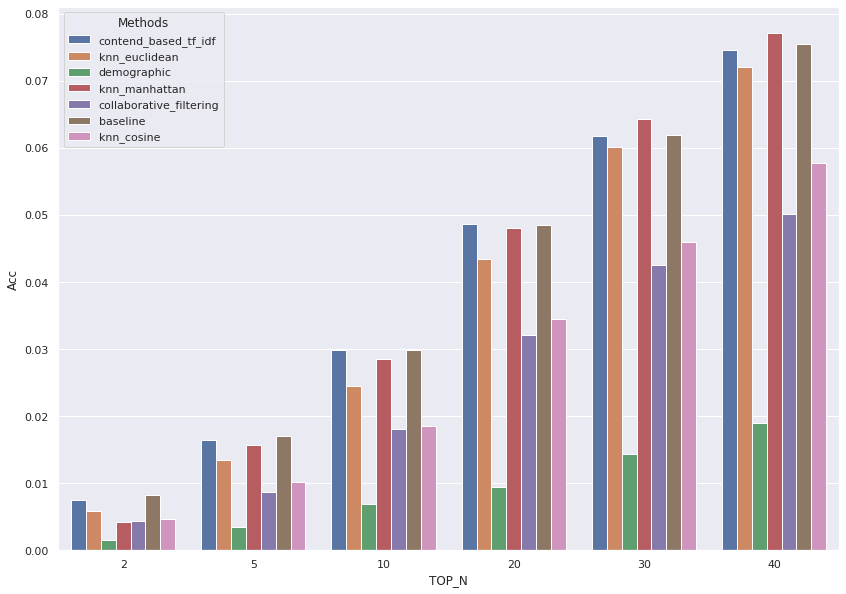

In [45]:
sns.set(rc={'figure.figsize':(14,10)})
ax = sns.barplot(x="TOP_N", y="Acc", data=df_all, hue='Methods')
ax.get_figure().savefig('task_1_acc_baseline_reversed.png')

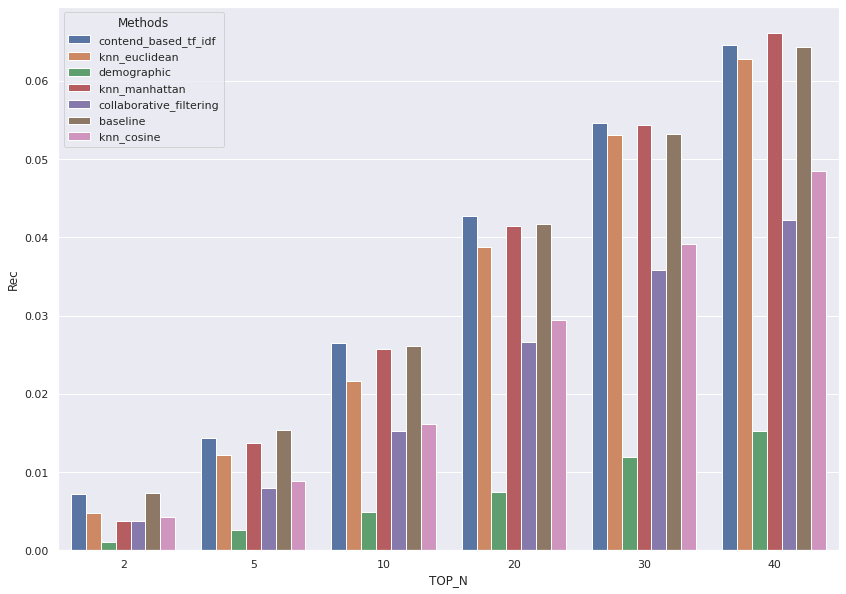

In [46]:
sns.set(rc={'figure.figsize':(14,10)})
ax = sns.barplot(x="TOP_N", y="Rec", data=df_all, hue='Methods')
ax.get_figure().savefig('task_1_rec_baseline_reversed.png')